In [6]:
%matplotlib inline

In [12]:
import tensorflow as tf
import numpy as np
import scipy.io
import scipy.misc
import vgg
import matplotlib.pyplot as plt
from sys import stderr
from functools import reduce

CONTENT_LAYER = 'relu4_2'
STYLE_LAYERS = ('relu1_1', 'relu2_1', 'relu3_1', 'relu4_1', 'relu5_1')

In [8]:
def imread(path):
    img = scipy.misc.imread(path).astype(np.float)
    if len(img.shape) == 2:
        # grayscale
        img = np.dstack((img,img,img))
    return img

def imsave(path, img):
    img = np.clip(img, 0, 255).astype(np.uint8)
    scipy.misc.imsave(path, img)
    
def _conv_layer(input, weights, bias):
    conv = tf.nn.conv2d(input, tf.constant(weights), strides=(1, 1, 1, 1),
            padding='SAME')
    return tf.nn.bias_add(conv, bias)


def _pool_layer(input):
    return tf.nn.max_pool(input, ksize=(1, 2, 2, 1), strides=(1, 2, 2, 1),
            padding='SAME')

def _tensor_size(tensor):
    from operator import mul
    return reduce(mul, (d.value for d in tensor.get_shape()), 1)


In [9]:
network = "imagenet-vgg-verydeep-19.mat"
initial = None
content_dir = "examples/1-content.jpg"
styles_dir = ["examples/1-style.jpg"]
iterations = 200
content_weight = 5e0
style_weight = 1e2
style_blend_weights = [1]
tv_weight = 1e2
learning_rate = 1e1
print_iterations = 10
checkpoint_iterations = 10

In [10]:
content = imread(content_dir)
styles = [imread(style) for style in styles_dir]
target_shape = content.shape
for i in range(len(styles)):
    style_scale = 1.0
    styles[i] = scipy.misc.imresize(styles[i], style_scale *
            target_shape[1] / styles[i].shape[1])

Iteration 1/200
  content loss: 2.13957e+06
    style loss: 5.85928e+07
       tv loss: 26.2488
    total loss: 6.07324e+07


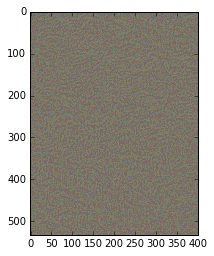

Iteration 2/200
Iteration 3/200
Iteration 4/200
Iteration 5/200
Iteration 6/200
Iteration 7/200
Iteration 8/200
Iteration 9/200
Iteration 10/200
Iteration 11/200
Iteration 12/200
Iteration 13/200
Iteration 14/200
Iteration 15/200
Iteration 16/200
Iteration 17/200
Iteration 18/200
Iteration 19/200
Iteration 20/200
Iteration 21/200
Iteration 22/200
Iteration 23/200
Iteration 24/200
Iteration 25/200
Iteration 26/200
Iteration 27/200
Iteration 28/200
Iteration 29/200
Iteration 30/200
Iteration 31/200
Iteration 32/200
Iteration 33/200
Iteration 34/200
Iteration 35/200
Iteration 36/200
Iteration 37/200
Iteration 38/200
Iteration 39/200
Iteration 40/200
Iteration 41/200
Iteration 42/200
Iteration 43/200
Iteration 44/200
Iteration 45/200
Iteration 46/200
Iteration 47/200
Iteration 48/200
Iteration 49/200
Iteration 50/200
Iteration 51/200
  content loss: 1.43398e+06
    style loss: 571365
       tv loss: 136476
    total loss: 2.14182e+06


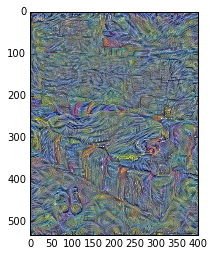

Iteration 52/200
Iteration 53/200
Iteration 54/200
Iteration 55/200
Iteration 56/200
Iteration 57/200
Iteration 58/200
Iteration 59/200
Iteration 60/200
Iteration 61/200
Iteration 62/200
Iteration 63/200
Iteration 64/200
Iteration 65/200
Iteration 66/200
Iteration 67/200
Iteration 68/200
Iteration 69/200
Iteration 70/200
Iteration 71/200
Iteration 72/200
Iteration 73/200
Iteration 74/200
Iteration 75/200
Iteration 76/200
Iteration 77/200
Iteration 78/200
Iteration 79/200
Iteration 80/200
Iteration 81/200
Iteration 82/200
Iteration 83/200
Iteration 84/200
Iteration 85/200
Iteration 86/200
Iteration 87/200
Iteration 88/200
Iteration 89/200
Iteration 90/200
Iteration 91/200
Iteration 92/200
Iteration 93/200
Iteration 94/200
Iteration 95/200
Iteration 96/200
Iteration 97/200
Iteration 98/200
Iteration 99/200
Iteration 100/200
Iteration 101/200
  content loss: 1.00277e+06
    style loss: 375574
       tv loss: 98101.9
    total loss: 1.47645e+06


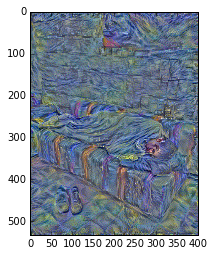

Iteration 102/200
Iteration 103/200
Iteration 104/200
Iteration 105/200
Iteration 106/200
Iteration 107/200
Iteration 108/200
Iteration 109/200
Iteration 110/200
Iteration 111/200
Iteration 112/200
Iteration 113/200
Iteration 114/200
Iteration 115/200
Iteration 116/200
Iteration 117/200
Iteration 118/200
Iteration 119/200
Iteration 120/200
Iteration 121/200
Iteration 122/200
Iteration 123/200
Iteration 124/200
Iteration 125/200
Iteration 126/200
Iteration 127/200
Iteration 128/200
Iteration 129/200
Iteration 130/200
Iteration 131/200
Iteration 132/200
Iteration 133/200
Iteration 134/200
Iteration 135/200
Iteration 136/200
Iteration 137/200
Iteration 138/200
Iteration 139/200
Iteration 140/200
Iteration 141/200
Iteration 142/200
Iteration 143/200
Iteration 144/200
Iteration 145/200
Iteration 146/200
Iteration 147/200
Iteration 148/200
Iteration 149/200
Iteration 150/200
Iteration 151/200
  content loss: 918028
    style loss: 305473
       tv loss: 81962.8
    total loss: 1.30546e+06


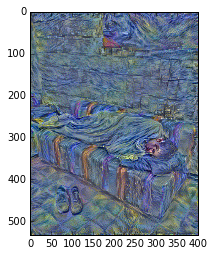

Iteration 152/200
Iteration 153/200
Iteration 154/200
Iteration 155/200
Iteration 156/200
Iteration 157/200
Iteration 158/200
Iteration 159/200
Iteration 160/200
Iteration 161/200
Iteration 162/200
Iteration 163/200
Iteration 164/200
Iteration 165/200
Iteration 166/200
Iteration 167/200
Iteration 168/200
Iteration 169/200
Iteration 170/200
Iteration 171/200
Iteration 172/200
Iteration 173/200
Iteration 174/200
Iteration 175/200
Iteration 176/200
Iteration 177/200
Iteration 178/200
Iteration 179/200
Iteration 180/200
Iteration 181/200
Iteration 182/200
Iteration 183/200
Iteration 184/200
Iteration 185/200
Iteration 186/200
Iteration 187/200
Iteration 188/200
Iteration 189/200
Iteration 190/200
Iteration 191/200
Iteration 192/200
Iteration 193/200
Iteration 194/200
Iteration 195/200
Iteration 196/200
Iteration 197/200
Iteration 198/200
Iteration 199/200
Iteration 200/200
  content loss: 935284
    style loss: 484439
       tv loss: 74894.6
    total loss: 1.49462e+06


In [47]:
shape = (1,) + content.shape
style_shapes = [(1,) + style.shape for style in styles]
content_features = {}
style_features = [{} for _ in styles]

# compute content features in feedforward mode
g = tf.Graph()
with g.as_default(), g.device('/cpu:0'), tf.Session() as sess:
    image = tf.placeholder('float', shape=shape)
    net, mean_pixel = vgg.net(network, image)
    content_pre = np.array([vgg.preprocess(content, mean_pixel)])
    content_features[CONTENT_LAYER] = net[CONTENT_LAYER].eval(
            feed_dict={image: content_pre})

# compute style features in feedforward mode
for i in range(len(styles)):
    g = tf.Graph()
    with g.as_default(), g.device('/cpu:0'), tf.Session() as sess:
        image = tf.placeholder('float', shape=style_shapes[i])
        net, _ = vgg.net(network, image)
        style_pre = np.array([vgg.preprocess(styles[i], mean_pixel)])
        for layer in STYLE_LAYERS:
            features = net[layer].eval(feed_dict={image: style_pre})
            features = np.reshape(features, (-1, features.shape[3]))
            gram = np.matmul(features.T, features) / features.size
            style_features[i][layer] = gram

# make stylized image using backpropogation
with tf.Graph().as_default():
    # init image
    noise = np.random.normal(size=shape, scale=np.std(content) * 0.1)
    initial = tf.random_normal(shape) * 0.256
    image = tf.Variable(initial)
    net, _ = vgg.net(network, image)

    # content loss
    content_loss = content_weight * (2 * tf.nn.l2_loss(
            net[CONTENT_LAYER] - content_features[CONTENT_LAYER]) /
            content_features[CONTENT_LAYER].size)
    
    # style loss
    style_loss = 0
    for i in range(len(styles)):
        style_losses = []
        for style_layer in STYLE_LAYERS:
            layer = net[style_layer]
            _, height, width, number = map(lambda i: i.value, layer.get_shape())
            size = height * width * number
            feats = tf.reshape(layer, (-1, number))
            gram = tf.matmul(tf.transpose(feats), feats) / size
            style_gram = style_features[i][style_layer]
            style_losses.append(2 * tf.nn.l2_loss(gram - style_gram) / style_gram.size)
        style_loss += style_weight * style_blend_weights[i] * reduce(tf.add, style_losses)
        
    # total variation denoising
    tv_y_size = _tensor_size(image[:,1:,:,:])
    tv_x_size = _tensor_size(image[:,:,1:,:])
    tv_loss = tv_weight * 2 * (
            (tf.nn.l2_loss(image[:,1:,:,:] - image[:,:shape[1]-1,:,:]) /
                tv_y_size) +
            (tf.nn.l2_loss(image[:,:,1:,:] - image[:,:,:shape[2]-1,:]) /
                tv_x_size))
    # overall loss
    loss = content_loss + style_loss + tv_loss

    # optimizer setup
    train_step = tf.train.AdamOptimizer(learning_rate).minimize(loss)

    def print_progress(i, last=False):
        stderr.write('Iteration %d/%d\n' % (i + 1, iterations))
        if last or (print_iterations and i % print_iterations == 0):
            stderr.write('  content loss: %g\n' % content_loss.eval())
            stderr.write('    style loss: %g\n' % style_loss.eval())
            stderr.write('       tv loss: %g\n' % tv_loss.eval())
            stderr.write('    total loss: %g\n' % loss.eval())
    # optimization
    best_loss = float('inf')
    best = None
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for i in range(iterations):
            last_step = (i == iterations - 1)
            print_progress(i, last=last_step)
            train_step.run()
            if (checkpoint_iterations and i % checkpoint_iterations == 0) or last_step:
                this_loss = loss.eval()
                if this_loss < best_loss:
                    best_loss = this_loss
                    best = image.eval()
                    output = vgg.unprocess(best.reshape(shape[1:]), mean_pixel)
                    plt.imshow(np.clip(output, 0, 255).astype(np.uint8))
                    plt.show()

In [16]:
# imsave('output.jpg', output)

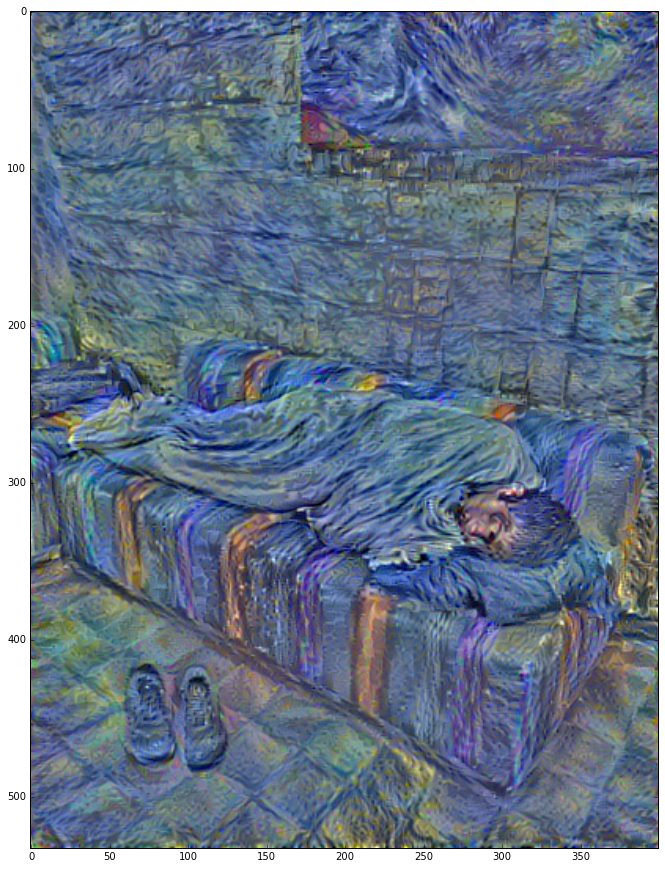

In [43]:
plt.figure(figsize = (15, 15))
plt.imshow(np.clip(output, 0, 255).astype(np.uint8))